# Ocenianie modelu regresji

Ciąg dalszy ćwiczeń z poprzedniego laboratorium.

## 1. Testy diagnostyczne reszt

Aby model regresji liniowej był prawidłowy, reszty (różnice między wartościami przewidywanymi przez model a rzeczywistymi) muszą spełniać kilka kryteriów:

- ich średnia wynosi zero,

In [ ]:
install.packages('tidyverse')

library(tidyverse)
rowery <- read_csv("./bikes.csv", col_types = "Dffffddddd")

rowery_model1 <- lm(data = rowery, rentals~temperature)
rowery_model1

rowery_model2 <- lm(data = rowery, rentals~humidity+windspeed+temperature)

summary(rowery_model2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Call:
lm(formula = rentals ~ temperature, data = rowery)

Coefficients:
(Intercept)  temperature  
     -166.9         78.5  



Call:
lm(formula = rentals ~ humidity + windspeed + temperature, data = rowery)

Residuals:
    Min      1Q  Median      3Q     Max 
-4780.5 -1082.6   -62.2  1056.5  3653.5 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2706.002    367.483   7.364 4.86e-13 ***
humidity    -3100.123    383.992  -8.073 2.83e-15 ***
windspeed    -115.463     17.028  -6.781 2.48e-11 ***
temperature    78.316      3.464  22.606  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1425 on 727 degrees of freedom
Multiple R-squared:  0.4609,	Adjusted R-squared:  0.4587 
F-statistic: 207.2 on 3 and 727 DF,  p-value: < 2.2e-16


In [ ]:
mean(rowery_model2$residuals) # średnia jest bardzo bliska 0, więc kryterium jest spełnione

[1] 5.62248e-14

- mają rozkład normalny,

In [ ]:
install.packages("olsrr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



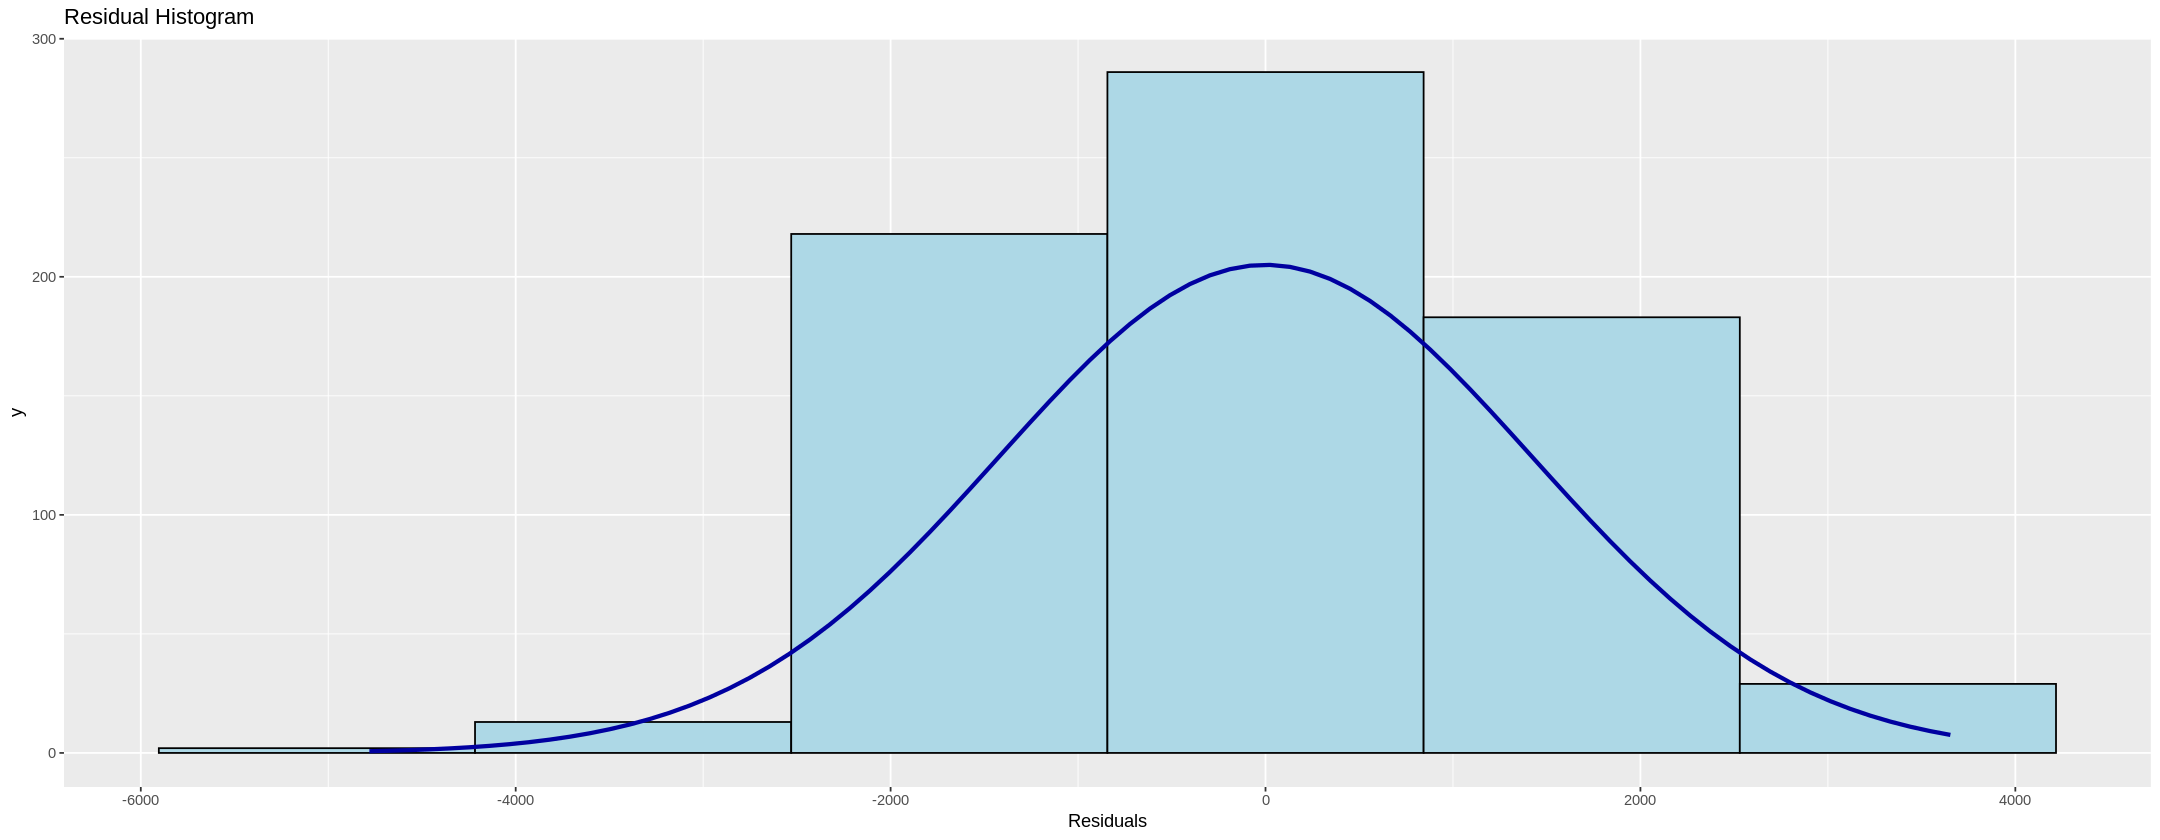

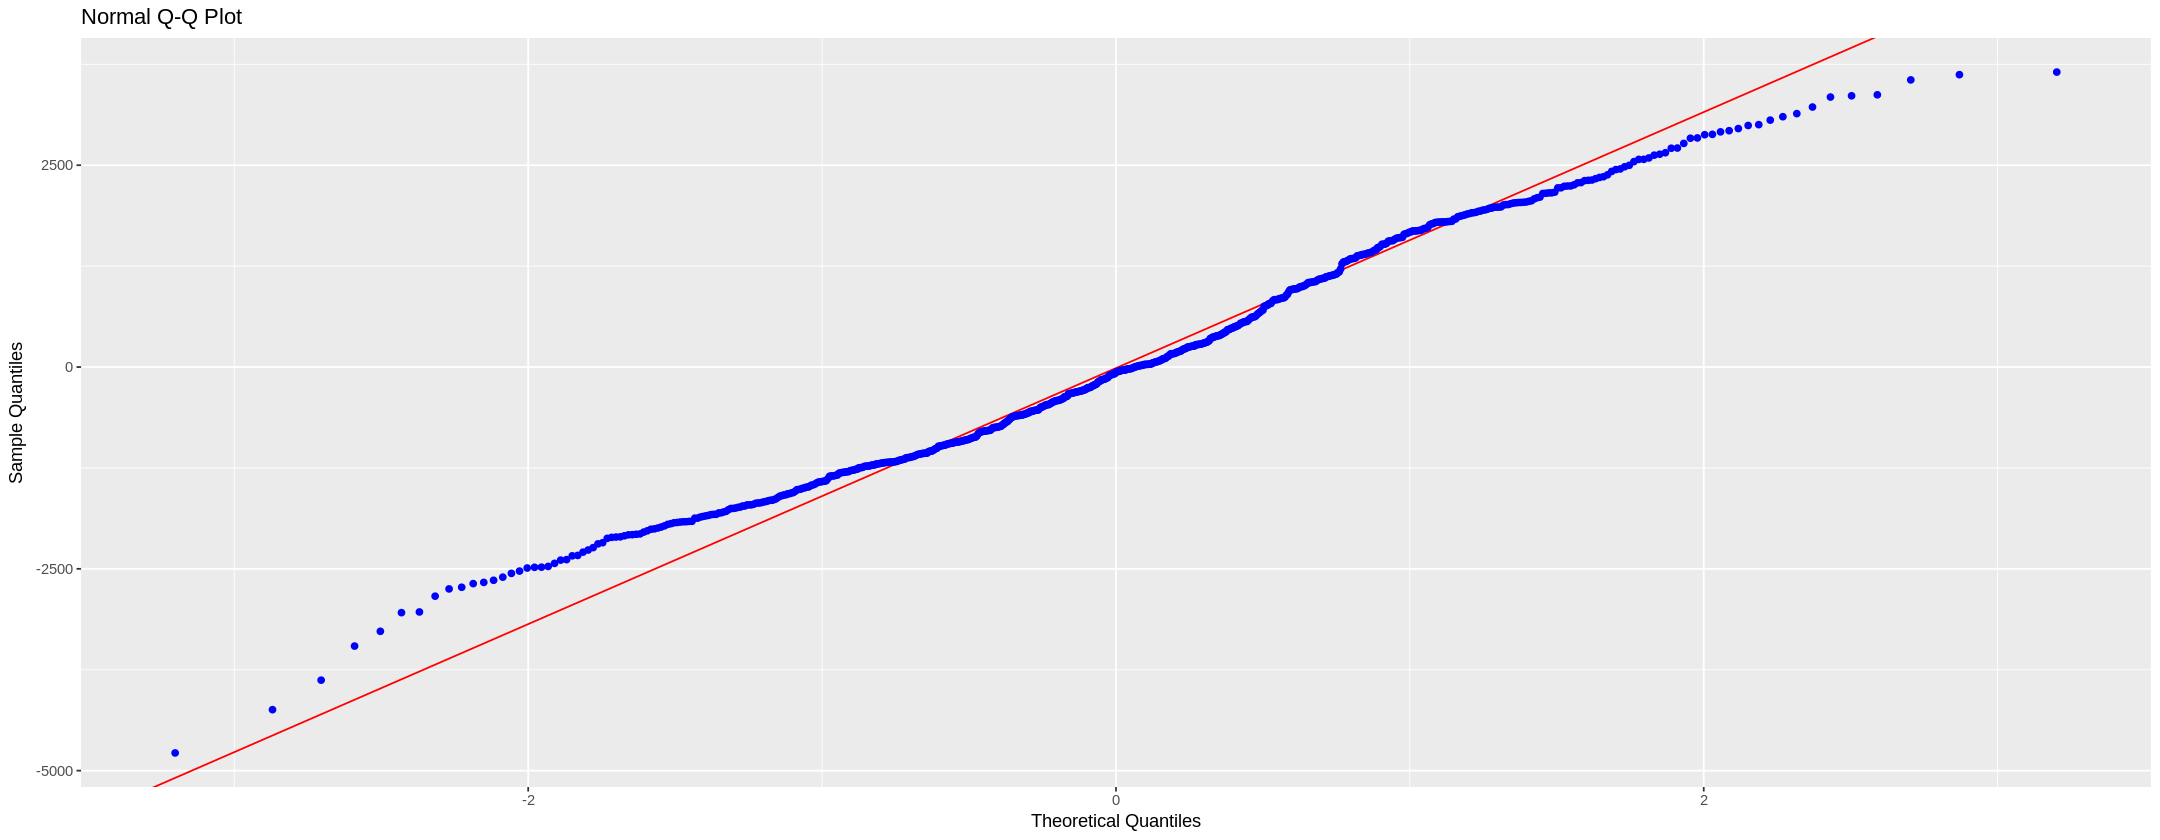

In [ ]:
library(olsrr)

ols_plot_resid_hist(rowery_model2)
ols_plot_resid_qq(rowery_model2)

- homoskedastyczność (wartości zmiennej niezależnej mają taką samą wariancję)

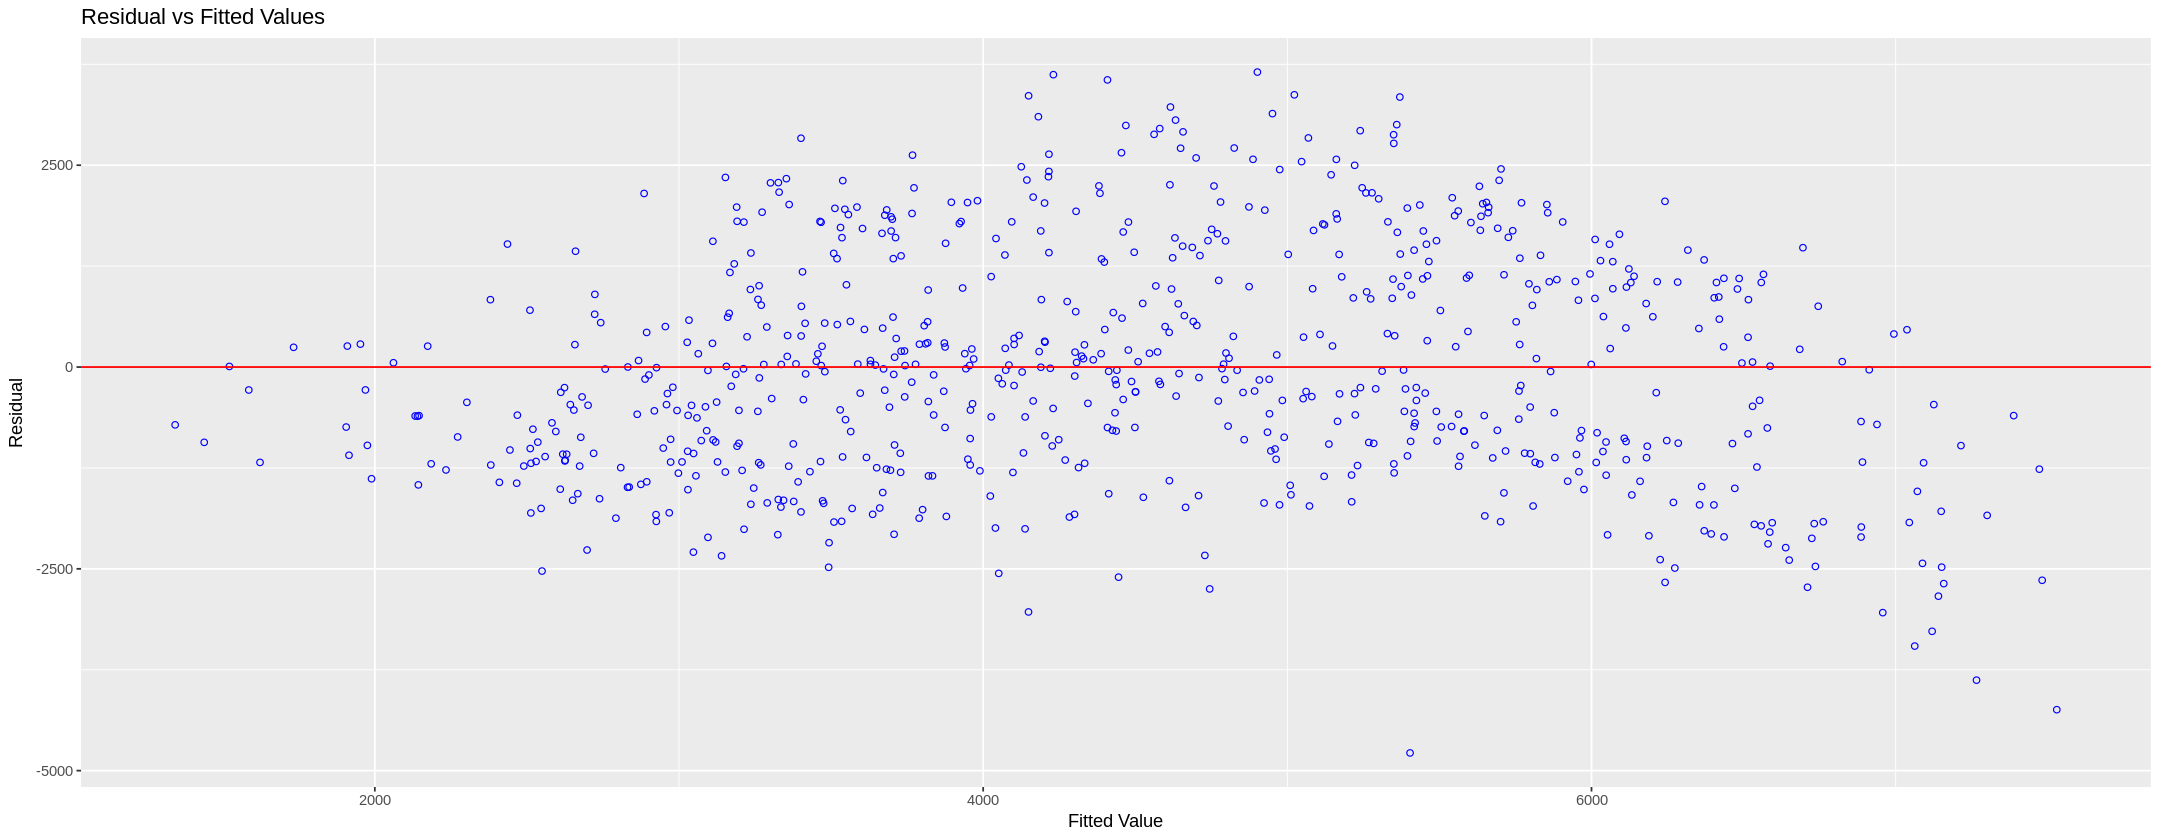

In [ ]:
ols_plot_resid_fit(rowery_model2)

- nie są skorelowane

In [ ]:
library(car)
# Test Durbina-Watsona
# 0 < DW < 2: dodatnia autokorelacja
# DW = 2: zerowa autokorelacja
# 2 < DW < 4: autokorelacja ujemna

durbinWatsonTest(rowery_model2)

 lag Autocorrelation D-W Statistic p-value
   1       0.7963326     0.4042771       0
 Alternative hypothesis: rho != 0

## 2. Analiza punktów wpływowych

Punkty wpływowe, to skrajne wartości zmiennych predyktorów, które mają znaczący wpływ na model regresji. W przypadku regresji wielokrotnej trudno jest znaleźć wartości odstające, które identyfikują punkty wpływowe. W tym celu stosuje się test statystyczny _odległość Cooka_.

observation,cooks_distance
<int>,<dbl>
69,0.083466470
239,0.021074076
204,0.020516659
50,0.017264207
203,0.013923865
668,0.012660294
205,0.010164468
210,0.009595062
554,0.007894590


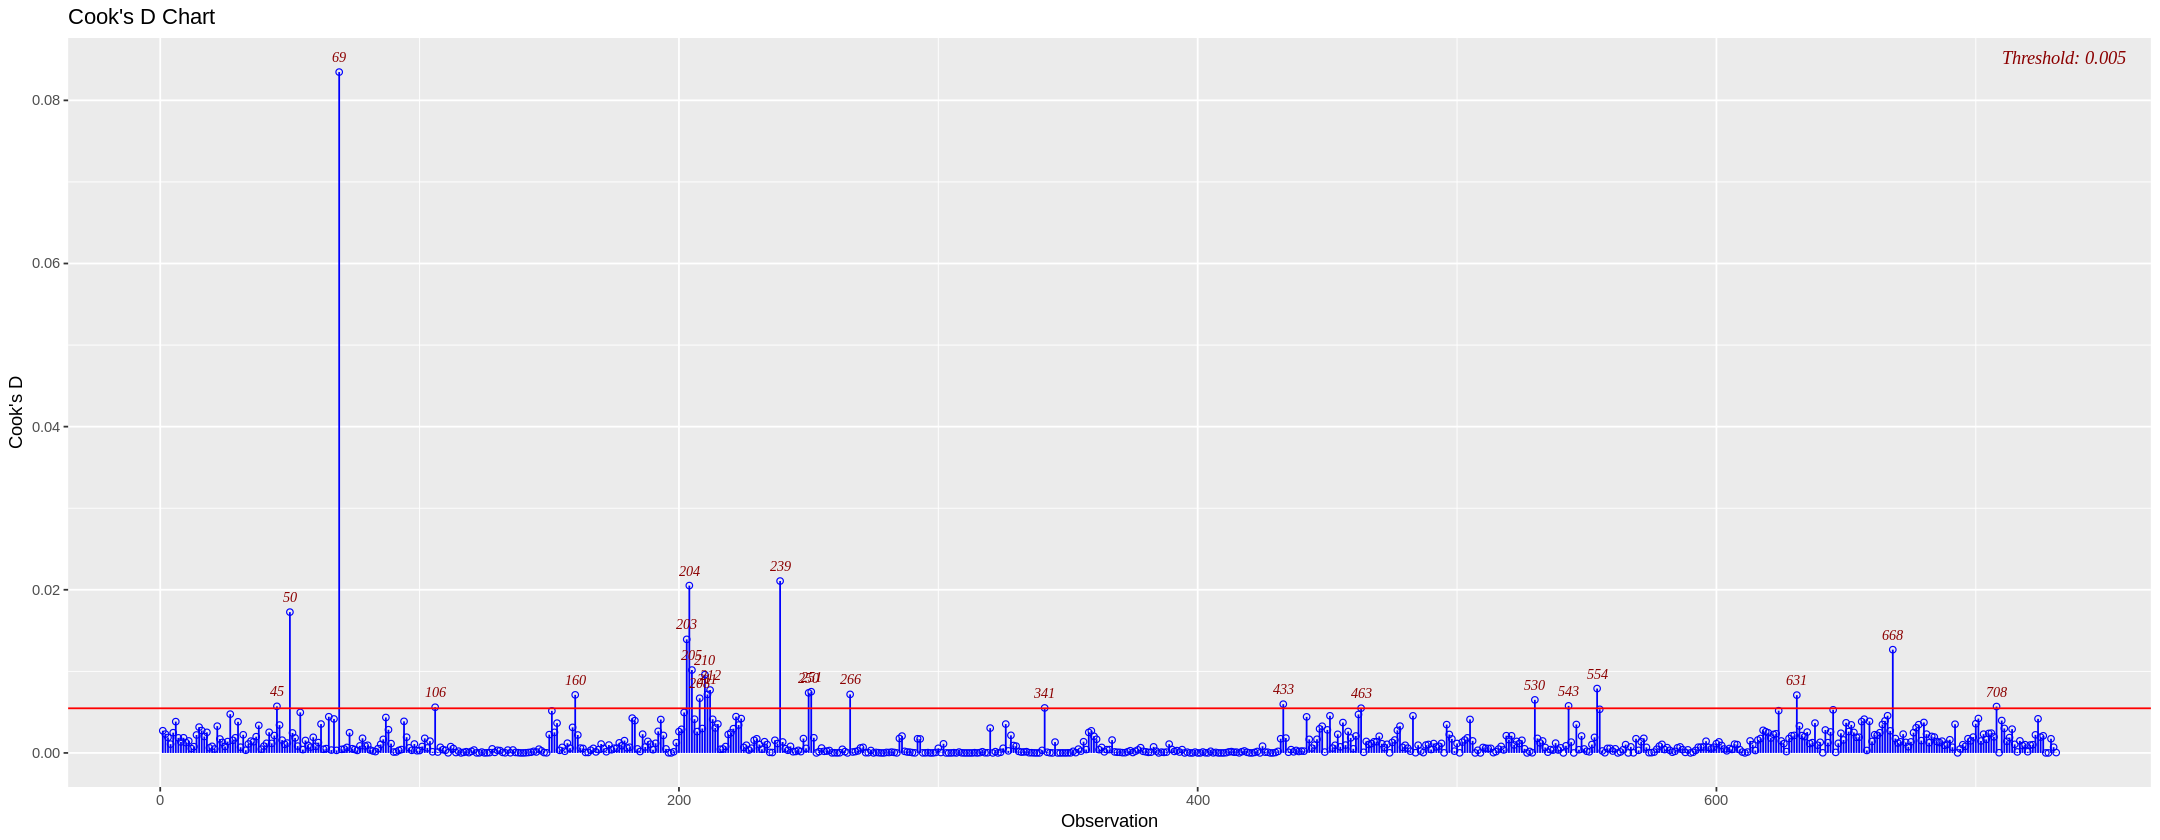

In [ ]:
library(olsrr)
# Wykres odległości Cooka
ols_plot_cooksd_chart(rowery_model2)

# Wyświetlenie wartości odstających według malejącej odległości Cooka
cooks_outliers <- ols_plot_cooksd_chart(rowery_model2, print_plot = FALSE)$outliers
arrange(cooks_outliers, desc(cooks_distance))

### Zadanie:

1. Porównaj obserwację o najwyższej odległości Cooka z podsumowaniem statystycznym pozostałych danych.
2. Zapisz indeksy 25 zidentyfikowanych punktów wpływowych w zmiennej `outlier_index`.
3. Porównaj podsumowania statystyczne zidentyfikowanych punktów wpływowych z podsumowaniem reszty danych. Jakie obserwujesz różnice?
4. Porównaj rozkład statystyczny oryginalnych danych z rozkładem statystycznym danych bez elementów odstających. Na tej podstawie zdecyduj, czy można usunąć z danych elementy odstające. Jeśli tak - zapisz kopię zbioru danych bez elementów odstających jako `rowery2`.

Porównanie obserwacji o najwyższej odległości Cooka z resztą danych

In [ ]:
rowery[69, c('humidity', 'rentals', 'temperature', 'windspeed')]

humidity,rentals,temperature,windspeed
<dbl>,<dbl>,<dbl>,<dbl>
0,623,50.5171,10.90243


In [ ]:
summary(rowery[-69, c('humidity', 'rentals', 'temperature', 'windspeed')])

    humidity         rentals      temperature      windspeed      
 Min.   :0.1879   Min.   :  22   Min.   :22.60   Min.   : 0.9322  
 1st Qu.:0.5205   1st Qu.:3170   1st Qu.:46.10   1st Qu.: 5.6182  
 Median :0.6271   Median :4548   Median :59.83   Median : 7.5342  
 Mean   :0.6288   Mean   :4510   Mean   :59.52   Mean   : 7.9262  
 3rd Qu.:0.7303   3rd Qu.:5966   3rd Qu.:73.07   3rd Qu.: 9.7088  
 Max.   :0.9725   Max.   :8714   Max.   :90.50   Max.   :21.1266  

Zapisanie indeksów 25 punktów wpływowych

In [ ]:
outlier_index <- cooks_outliers$observation[1:min(25, length(cooks_outliers$observation))]

print(outlier_index)

 [1]  45  50  69 106 160 203 204 205 208 210 211 212 239 250 251 266 341 433 463
[20] 530 543 554 631 668 708


Porównanie statystyk punktów wpływowych z resztą danych

In [ ]:
summary(rowery[-outlier_index, c('humidity', 'rentals', 'temperature', 'windspeed')])
summary(rowery[outlier_index, c('humidity', 'rentals', 'temperature', 'windspeed')])

    humidity         rentals      temperature      windspeed      
 Min.   :0.2758   Min.   : 431   Min.   :22.60   Min.   : 0.9322  
 1st Qu.:0.5235   1st Qu.:3206   1st Qu.:45.62   1st Qu.: 5.5992  
 Median :0.6308   Median :4570   Median :59.30   Median : 7.5082  
 Mean   :0.6290   Mean   :4536   Mean   :59.11   Mean   : 7.8498  
 3rd Qu.:0.7296   3rd Qu.:5990   3rd Qu.:72.87   3rd Qu.: 9.6318  
 Max.   :0.9625   Max.   :8714   Max.   :88.17   Max.   :17.5801  

    humidity         rentals      temperature      windspeed     
 Min.   :0.0000   Min.   :  22   Min.   :49.89   Min.   : 3.263  
 1st Qu.:0.4658   1st Qu.:1842   1st Qu.:54.61   1st Qu.: 6.809  
 Median :0.5675   Median :3606   Median :71.23   Median : 8.024  
 Mean   :0.5960   Mean   :3617   Mean   :70.76   Mean   :10.202  
 3rd Qu.:0.8800   3rd Qu.:4840   3rd Qu.:85.77   3rd Qu.:14.291  
 Max.   :0.9725   Max.   :8395   Max.   :90.50   Max.   :21.127  

Oceniam rozkład statystyczny oryginalnych danych i danych bez outlierów. Porównuję oba modele przez summary() i na koniec tworzę kopię danych bez outlierów.

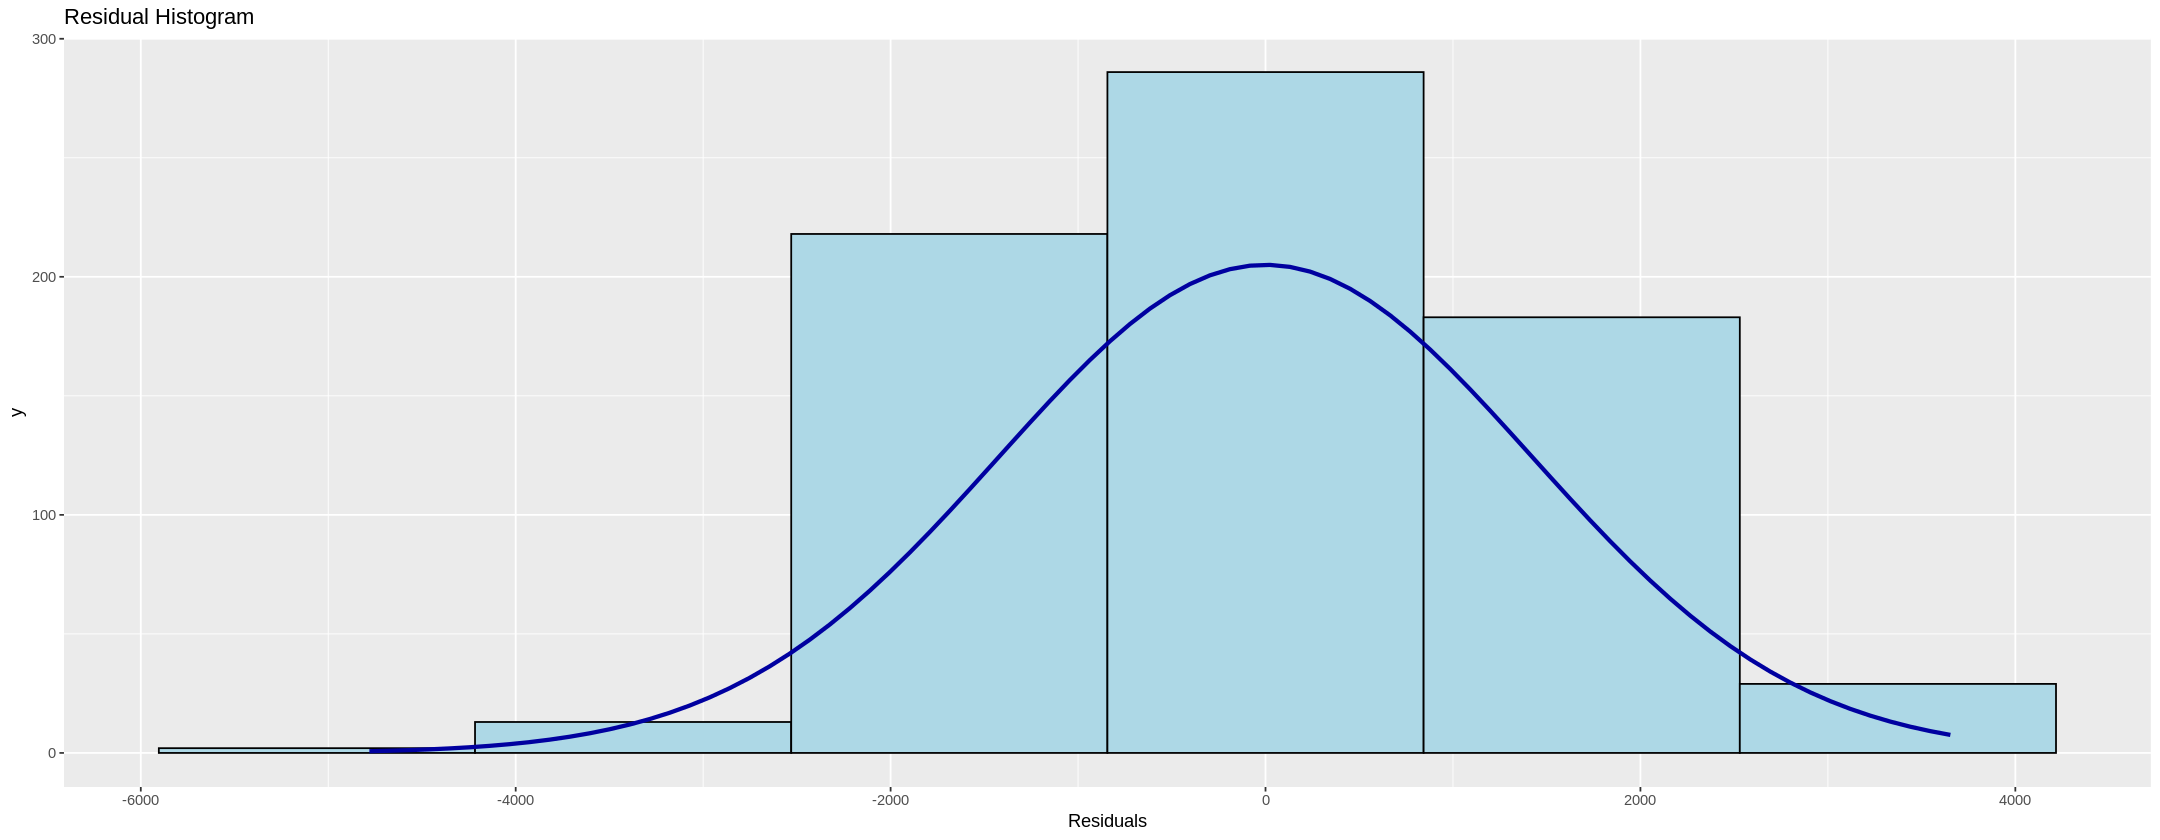


Call:
lm(formula = rentals ~ humidity + windspeed + temperature, data = rowery)

Residuals:
    Min      1Q  Median      3Q     Max 
-4780.5 -1082.6   -62.2  1056.5  3653.5 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2706.002    367.483   7.364 4.86e-13 ***
humidity    -3100.123    383.992  -8.073 2.83e-15 ***
windspeed    -115.463     17.028  -6.781 2.48e-11 ***
temperature    78.316      3.464  22.606  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1425 on 727 degrees of freedom
Multiple R-squared:  0.4609,	Adjusted R-squared:  0.4587 
F-statistic: 207.2 on 3 and 727 DF,  p-value: < 2.2e-16



Call:
lm(formula = formula(rowery_model2), data = rowery[-outlier_index, 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-2896.9 -1058.8   -87.2   944.1  3565.9 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2604.664    359.013   7.255 1.07e-12 ***
humidity    -3330.928    385.701  -8.636  < 2e-16 ***
windspeed    -113.927     16.882  -6.748 3.13e-11 ***
temperature    83.244      3.365  24.738  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1346 on 702 degrees of freedom
Multiple R-squared:  0.5083,	Adjusted R-squared:  0.5062 
F-statistic: 241.9 on 3 and 702 DF,  p-value: < 2.2e-16


date,season,holiday,weekday,weather,temperature,realfeel,humidity,windspeed,rentals
<date>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2011-01-01,1,0,6,2,46.71653,46.39865,0.805833,6.679665,985
2011-01-02,1,0,0,2,48.35024,45.22419,0.696087,10.347140,801
2011-01-03,1,0,1,1,34.21239,25.70131,0.437273,10.337565,1349
2011-01-04,1,0,2,1,34.52000,28.40009,0.590435,6.673420,1562
2011-01-05,1,0,3,1,36.80056,30.43728,0.436957,7.780994,1600
2011-01-06,1,0,4,1,34.88784,30.90523,0.518261,3.728766,1606


[1] 706

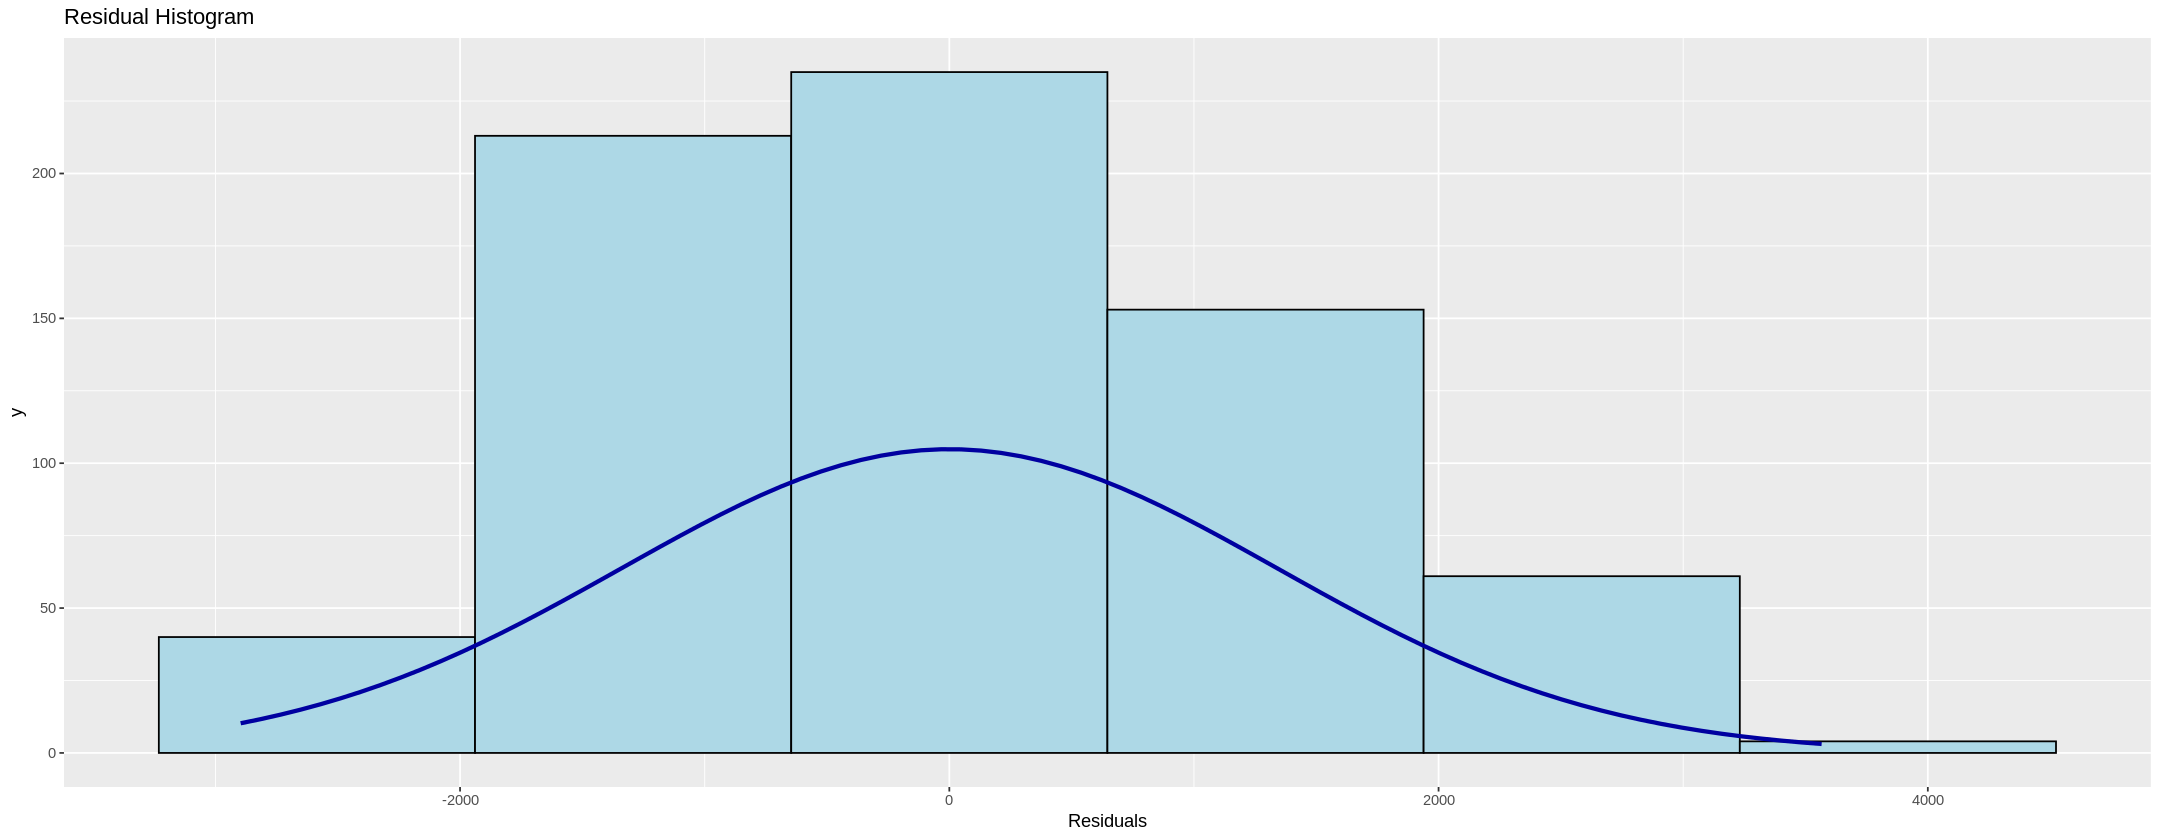

In [ ]:
ols_plot_resid_hist(rowery_model2)
rowery_model2_no_outliers <- lm(formula(rowery_model2), data = rowery[-outlier_index, ])
ols_plot_resid_hist(rowery_model2_no_outliers)

summary(rowery_model2)
summary(rowery_model2_no_outliers)

rowery2 <- rowery[-outlier_index, ]
head(rowery2)
nrow(rowery2)

# Tu wpisz swoje rozwiązanie

## 3. Współliniowość

Zjawisko współliniowości zachodzi wówczas, gdy zmienne predyktorów (dwie lub więcej) są ze sobą mocno skorelowane. W modelach regresji liniowej skutkuje to zawyżonymi błędami standardowymi i utrudnia oddzielenie wpływu poszczególnych predyktorów na odpowiedź.

Do wykrywania współliniowości służy współczynnik inflacji wariancji VIF (ang. _Variance Inflation Factor_). $VIF = \frac{1}{1 - R^2_k = \frac{1}{Tolerance}}$, gdzie $R^2_k$ to współczynnik determinacji $R^2$ równania regresji, gdzie predyktor $k$ znajduje się po lewej stronie, a wszystkie pozostałe zmienne predyktorów po prawej.

Przyjmuje się, że współliniowość istnieje wówczas, gdy $VIF > 5$ ($Tolerance < 0.2$).

Oblicz współczynnik VIF dla zmiennych predyktorów modelu `rowery_model2`.

In [ ]:
ols_vif_tol(rowery_model2)

Variables,Tolerance,VIF
<chr>,<dbl>,<dbl>
humidity,0.9303623,1.074850
windspeed,0.9220157,1.084580
temperature,0.9668533,1.034283


## 4. Ulepszanie modelu

### Uwzględnienie relacji nieliniowych - regresja wielomianowa

Wykres zależności zmiennej `rentals` od pozostałych predyktorów. Niebieska linia - dopasowanie regresji liniowej, czerwona - dopasowanie po wprowadzeniu predyktorów wielomianowych.

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ s(x, bs = "cs")'


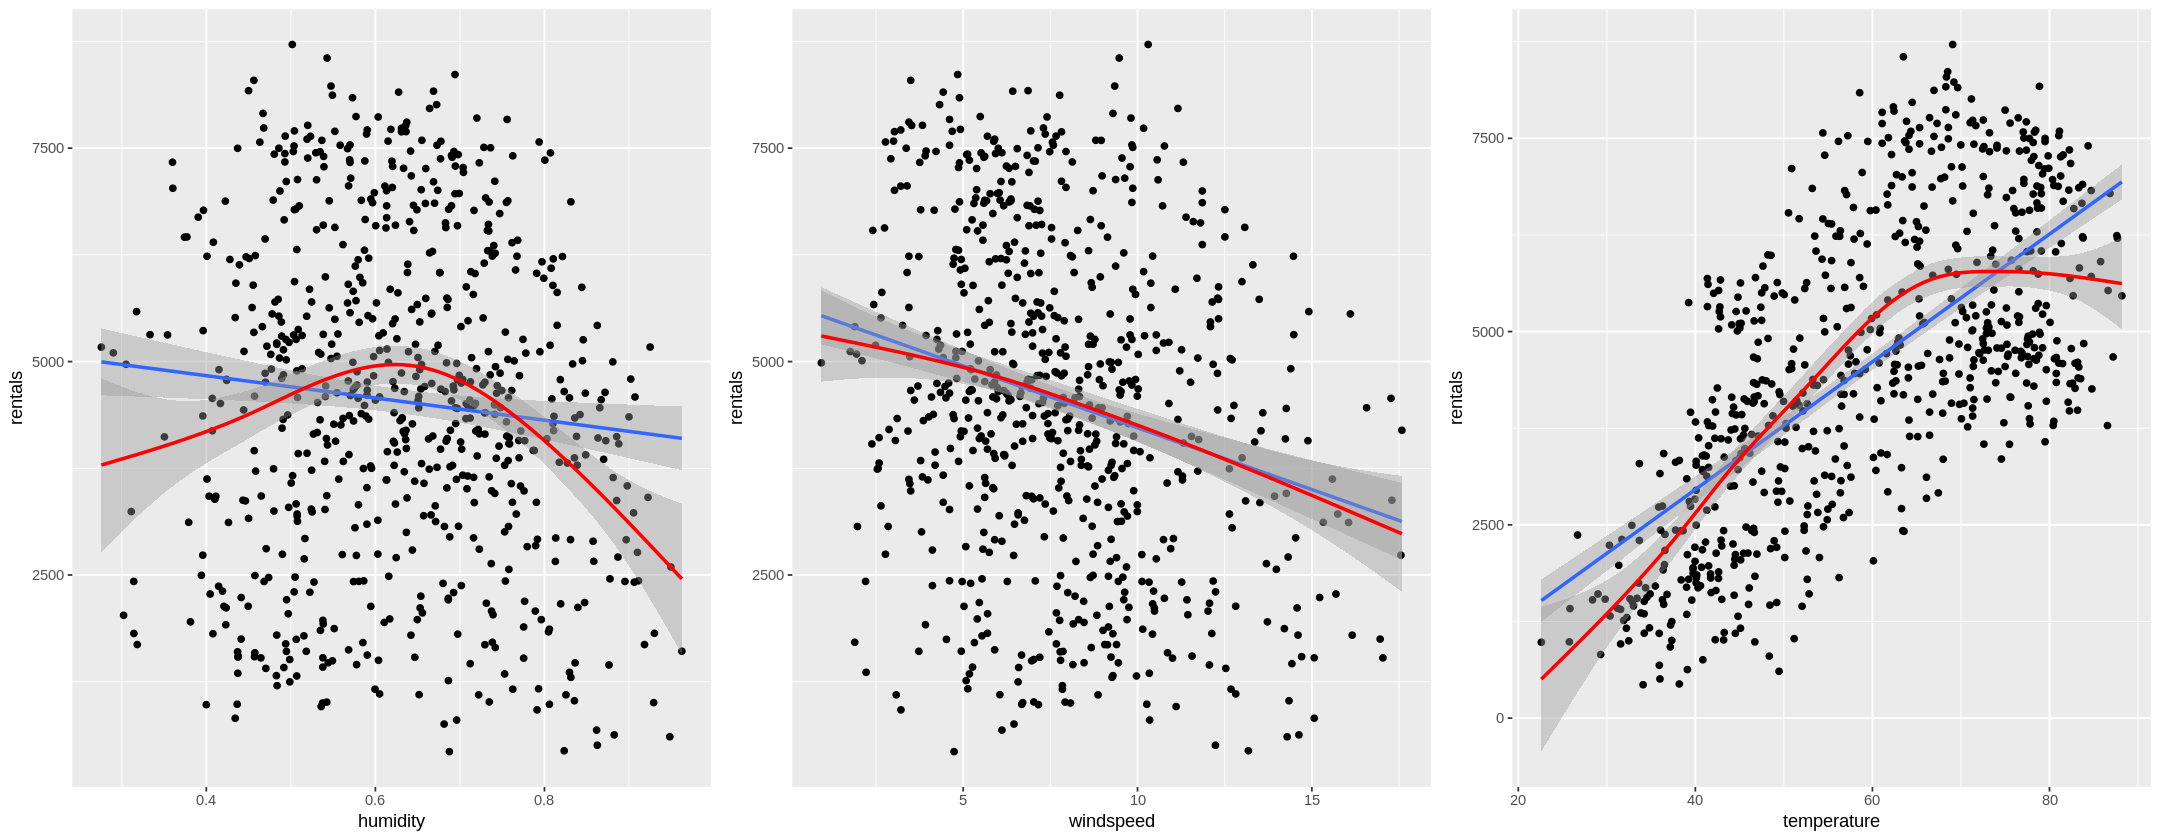

In [ ]:
#install.packages("ggplot2")
library(ggplot2)

#df <- data.frame(x,y)
humid <- ggplot(data=rowery2, aes(x=humidity, y=rentals)) + geom_point() +
  geom_smooth(method = 'lm', se = TRUE) +
  geom_smooth(method = 'gam', colour = 'red')
wind <-  ggplot(data=rowery2, aes(x=windspeed, y=rentals)) + geom_point() +
  geom_smooth(method = 'lm', se = TRUE) +
  geom_smooth(method = 'gam', colour = 'red')
temp <-  ggplot(data=rowery2, aes(x=temperature, y=rentals)) + geom_point() +
  geom_smooth(method = 'lm', se = TRUE) +
  geom_smooth(method = 'gam', colour = 'red')

library(gridExtra)
options(repr.plot.width=18, repr.plot.height=7)
grid.arrange(humid, wind, temp, nrow=1, ncol=3)

Dodaj do modelu wersje predyktorów podniesionych do kwadratu:

In [ ]:
# Dodanie nowych predyktorów
rowery2 <- rowery2 %>%
  mutate(humidity2 = humidity^2) %>%
  mutate(windspeed2 = windspeed^2) %>%
  mutate(temperature2 = temperature^2)

# Utworzenie nowego modelu liniowego
rowery_model3 <- lm(data = rowery2,
                    rentals ~ temperature + humidity2 + temperature2)

summary(rowery_model3)


Call:
lm(formula = rentals ~ temperature + humidity2 + temperature2, 
    data = rowery2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3188.8 -1017.4  -104.3   995.2  3019.1 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -7469.3775   736.7199  -10.14   <2e-16 ***
temperature    384.3592    26.9149   14.28   <2e-16 ***
humidity2    -3024.1131   286.3595  -10.56   <2e-16 ***
temperature2    -2.5368     0.2271  -11.17   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1274 on 702 degrees of freedom
Multiple R-squared:  0.5596,	Adjusted R-squared:  0.5577 
F-statistic: 297.3 on 3 and 702 DF,  p-value: < 2.2e-16


Sprawdź, czy wszystkie predyktory są istotne. Jeśli nie - popraw model usuwając zmienne nieistotne. Porównaj dane diagnostyczne nowego modelu z danymi modelu poprzedniego. Co się zmieniło?

### Uwzględnienie zmiennych kategorialnych

Za pomocą funkcji `summary()` wyświetl podsumowanie dla zmiennych czynnikowych `season`, `holiday`, `weekday` oraz `weather`.

Zamień wartości liczbowe reprezentujące wartości kategorialne na opisowe. Służy do tego funkcja `revalue()` z pakiety `plyr`.

In [ ]:
rowery2 <- rowery2 %>%
  mutate(season = plyr::revalue(season, c("1" = "Zima", "2" = "Wiosna",
                                    "3" = "Lato", "4" = "Jesien"))) %>%
  mutate(holiday = plyr::revalue(holiday, c("0" = "Nie", "1" = "Tak"))) %>%
  mutate(weekday = plyr::revalue(weekday, c("0" = "Niedziela","1" = "Poniedzialek",
                                      "2" = "Wtorek", "3" = "Sroda", "4" = "Czwartek",
                                      "5" = "Piatek", "6" = "Sobota"))) %>%
  mutate(weather = plyr::revalue(weather, c("1" = "Ladna pogoda", "2" = "Lekkie opady",
                                      "3" = "Obfite opady")))

Utwórz kolejny model, uwzględniający wybraną zmienną kategorialną. Przeanalizuj podsumowanie modelu.

In [ ]:
rowery_model4 <- lm(data = rowery2,
                    rentals ~ temperature + humidity2 + temperature2 + season)

summary(rowery_model4)


Call:
lm(formula = rentals ~ temperature + humidity2 + temperature2 + 
    season, data = rowery2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3497.2  -977.6   -91.8  1006.0  3733.6 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5839.3935   794.2011  -7.353 5.45e-13 ***
temperature    314.9352    30.0566  10.478  < 2e-16 ***
humidity2    -3209.7768   275.7809 -11.639  < 2e-16 ***
temperature2    -2.0001     0.2587  -7.731 3.72e-14 ***
seasonWiosna   448.1310   174.6176   2.566  0.01048 *  
seasonLato     612.2128   229.3672   2.669  0.00778 ** 
seasonJesien  1148.3051   150.0912   7.651 6.64e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1220 on 699 degrees of freedom
Multiple R-squared:  0.598,	Adjusted R-squared:  0.5945 
F-statistic: 173.3 on 6 and 699 DF,  p-value: < 2.2e-16



### Interakcje między zmiennymi

Zdarza się, że dwie zmienne mają łączny wpływ na odpowiedź. Na przykład interakcje mogą zachodzić między zmiennymi `weather` oraz `windspeed` lub między zmiennymi `weather` a `temperature`. Efekt interakcji można uwzględnić w modelu regresji przy użyciu operatora `*`.

Utwórz nowy model regresji, uwzględniający interakcję `weather * windspeed`.

### Wybieranie ważnych zmiennych

W zbiorze danych `rowery2` dodaj trzy predyktory oparte na zmiennej `date`:

- `dzien` - liczba dni, jakie upłynęły od dnia rozpoczęcia programu (różnica między zmienną `date` a minimalną wartością zmiennej `date`)

- `miesiac`

- `rok`.

In [ ]:
rowery_model5 <- lm(data = rowery2,
                    rentals ~ temperature + temperature2 + humidity2 + season + weather * windspeed)
summary(rowery_model5)


Call:
lm(formula = rentals ~ temperature + temperature2 + humidity2 + 
    season + weather * windspeed, data = rowery2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3595.5  -969.7   -59.5  1003.3  3240.3 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -4995.9506   787.1085  -6.347 3.96e-10 ***
temperature                     330.1288    29.0178  11.377  < 2e-16 ***
temperature2                     -2.1673     0.2497  -8.681  < 2e-16 ***
humidity2                     -3161.3039   363.9482  -8.686  < 2e-16 ***
seasonWiosna                    485.5047   168.2070   2.886  0.00402 ** 
seasonLato                      610.5682   221.7233   2.754  0.00605 ** 
seasonJesien                   1053.7087   146.2572   7.204 1.52e-12 ***
weatherLadna pogoda            -473.6131   258.3083  -1.834  0.06715 .  
weatherObfite opady           -2171.7613   967.6466  -2.244  0.02512 *  
windspeed                      -147.965

In [ ]:
library(lubridate)

rowery2 <- rowery2 %>%
  mutate(dzien = as.numeric(date - min(date))) %>%
  mutate(miesiac = as.factor(month(date))) %>%
  mutate(rok = as.factor(year(date))) %>%
  select(-date)

Zastosuj funkcję `ols_step_both_p()` do selekcji zmiennych:

In [ ]:
ols_step_both_p(
  model = lm(
    data = rowery2,
    rentals ~ humidity + weekday + holiday +
      temperature + humidity2 + temperature2 + season +
      windspeed * weather + realfeel + dzien + miesiac + rok
  ),
  pent = 0.2, # wartość progowa p zmiennych uwzględnianych w modelu
  prem = 0.01, # progowa wartość p zmiennych usuwanych z modelu
  details = FALSE # flaga wskazująca jak dużo informacji wyświetlać
)



                                      Stepwise Summary                                      
------------------------------------------------------------------------------------------
Step    Variable                    AIC          SBC         SBIC         R2       Adj. R2 
------------------------------------------------------------------------------------------
 0      Base Model               12678.126    12687.245    10672.148    0.00000    0.00000 
 1      realfeel (+)             12266.283    12279.962    10260.350    0.44355    0.44276 
 2      dzien (+)                11781.194    11799.432     9777.849    0.72088    0.72008 
 3      humidity2 (+)            11680.701    11703.499     9678.640    0.75860    0.75756 
 4      windspeed (+)            11647.400    11674.758     9646.286    0.77037    0.76906 
 5      rok (+)                  11616.137    11648.054     9616.192    0.78094    0.77937 
 6      season (+)               11461.682    11507.278     9462.421    0.82547

Utwórz nowy model, wykorzystując zmienne wybrane podczas selekcji. Następnie ponownie sprawdź homoskedastyczność modelu.

In [ ]:
rowery_model6 <- lm(data = rowery2,
                   rentals ~ humidity + weekday + holiday + temperature + humidity2 + temperature2 + season + windspeed*weather + dzien + miesiac + rok)

summary(rowery_model6)


Call:
lm(formula = rentals ~ humidity + weekday + holiday + temperature + 
    humidity2 + temperature2 + season + windspeed * weather + 
    dzien + miesiac + rok, data = rowery2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3421.1  -365.5    40.4   390.3  2648.0 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -5659.7132   703.0271  -8.050 3.74e-15 ***
humidity                       5530.7768  1666.6306   3.319 0.000954 ***
weekdayNiedziela               -467.1916    95.7358  -4.880 1.33e-06 ***
weekdayPoniedzialek            -247.9307    98.4729  -2.518 0.012042 *  
weekdayWtorek                  -202.7662    96.0315  -2.111 0.035101 *  
weekdaySroda                   -123.5139    96.5391  -1.279 0.201191    
weekdayCzwartek                 -86.5453    96.5958  -0.896 0.370598    
weekdayPiatek                   -23.6311    96.3489  -0.245 0.806325    
holidayTak                     -560.2110   157.9546 

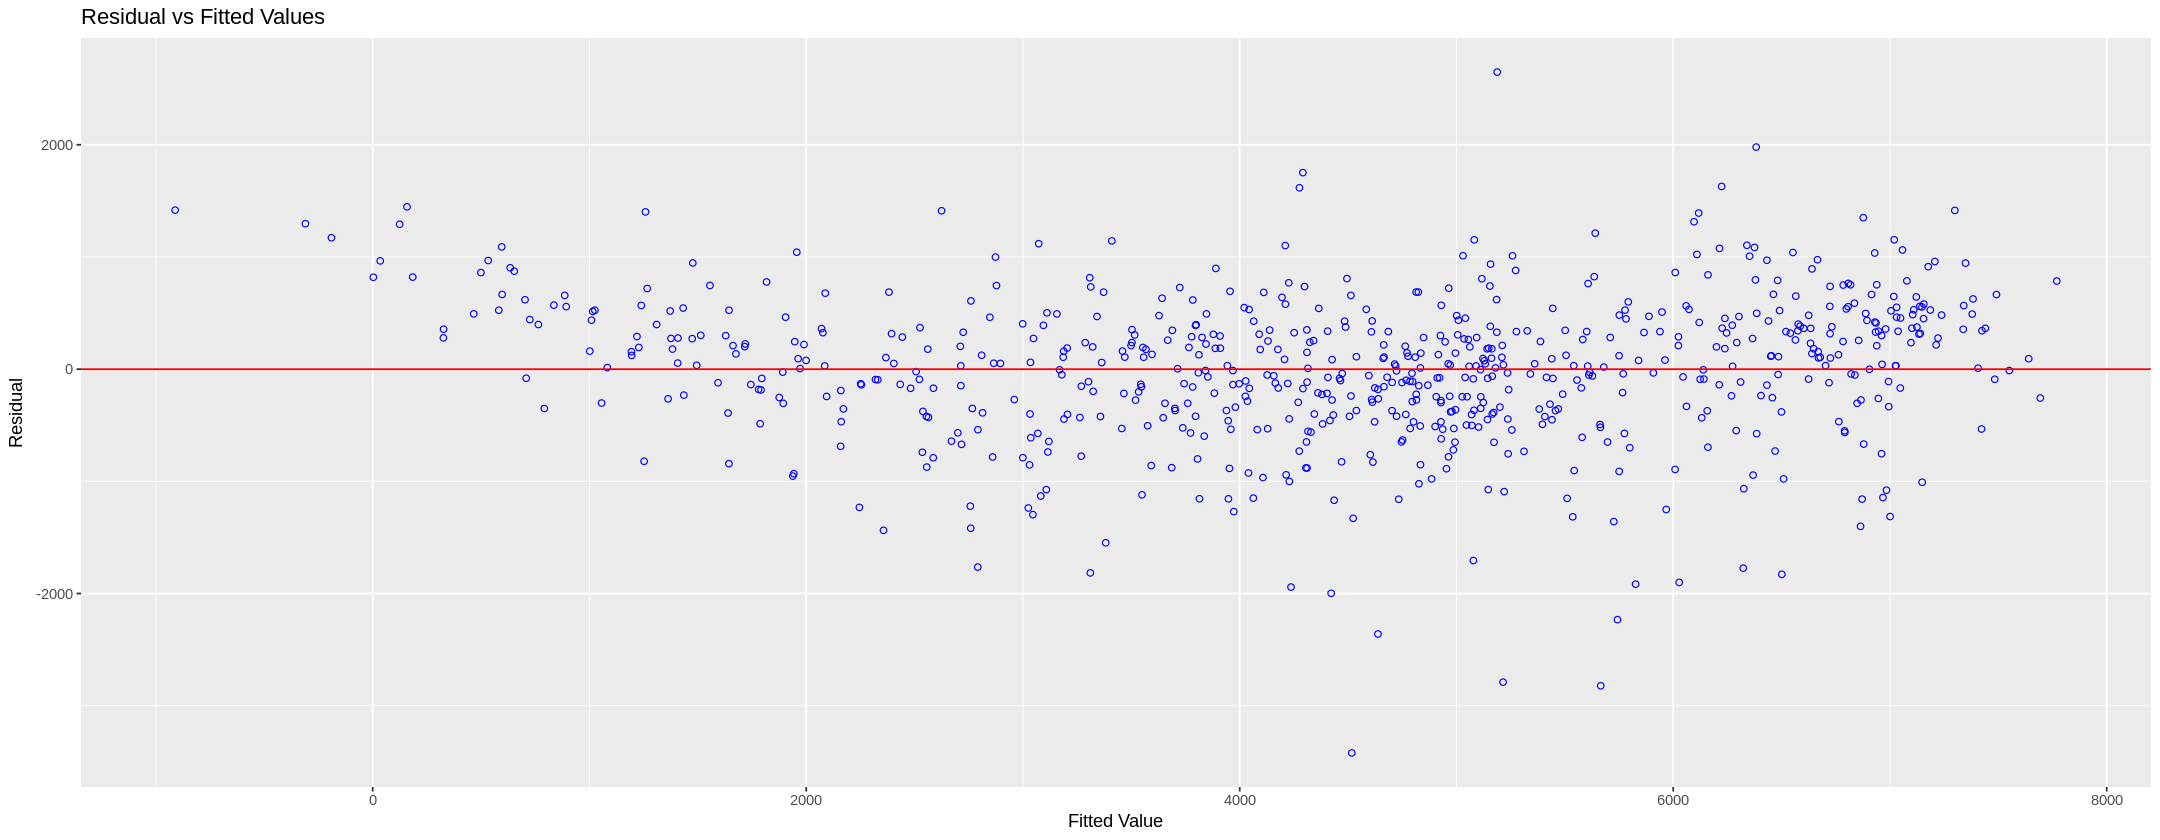

In [ ]:
ols_plot_resid_fit(rowery_model6)

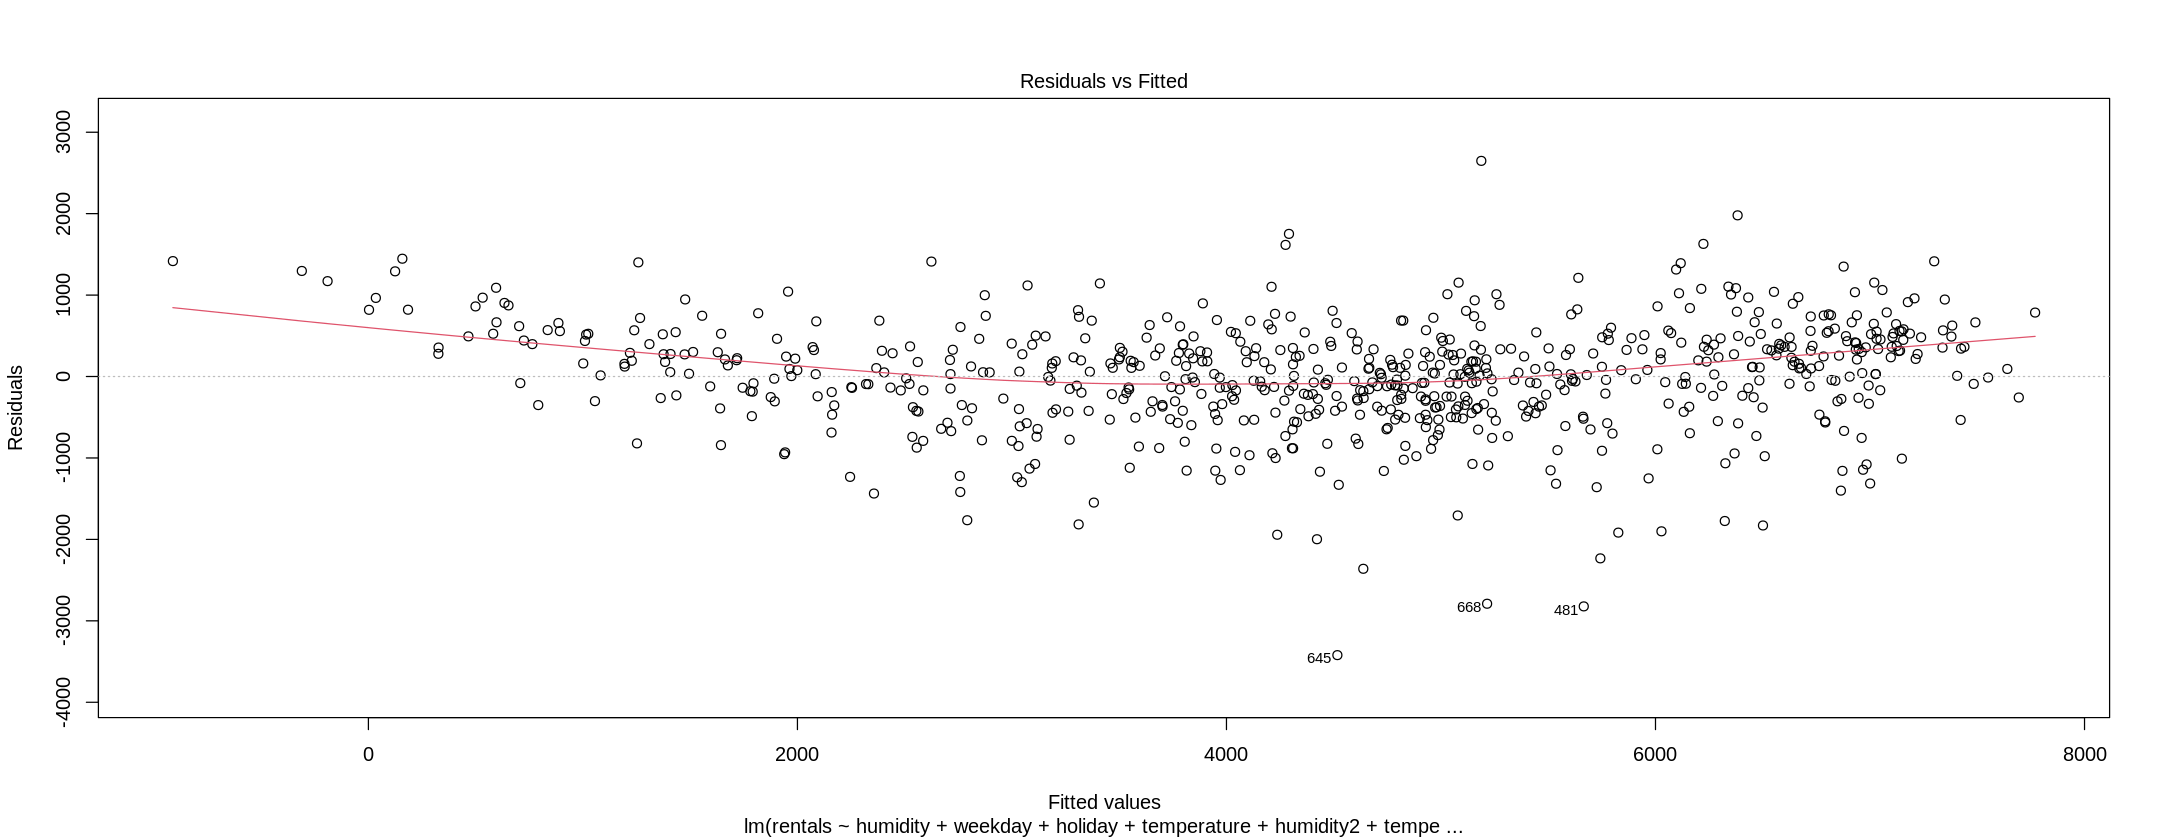

In [ ]:
plot(rowery_model6, which = 1)

Punkty na wykresach rozkładają się losowo. Brak widocznych wzorców czy grupowania sugeruje, że nie ma problemów w heteroskedastycznością.

Czerwona linia zbliża się kształtem do prostje y=0, co również potwierdza, że wariancja reszt jest w miarę stała, co jest zgodne z założeniem homoskedastyczności

# Tu wpisz swoje rozwiązanie